In [ ]:
!unzip covid_1999

Archive:  covid_1999.zip
   creating: Dataset4/
   creating: Dataset4/Test/
   creating: Dataset4/Test/Covid/
  inflating: Dataset4/Test/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Dataset4/Test/Covid/0a7faa2a.jpg  
  inflating: Dataset4/Test/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-c.png  
  inflating: Dataset4/Test/Covid/1-s2.0-S2387020620301959-gr4_lrg-b.png

In [ ]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from IPython.display import display
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import numpy as np
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [ ]:
train_path = "CovidDataset/Train"
valid_path = "CovidDataset/Test"

In [ ]:
# add preprocessing layer to the front of VGG
#vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 322 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set = test_datagen.flow_from_directory(
    'CovidDataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 80 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
11/11 [==============================] - 15s 1s/step - loss: 1.0498 - accuracy: 0.6957 - val_loss: 0.1530 - val_accuracy: 0.9750
Epoch 2/25
11/11 [==============================] - 12s 1s/step - loss: 0.2677 - accuracy: 0.8944 - val_loss: 0.0075 - val_accuracy: 0.9875
Epoch 3/25
11/11 [==============================] - 12s 1s/step - loss: 0.0758 - accuracy: 0.9814 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 4/25
11/11 [==============================] - 13s 1s/step - loss: 0.0865 - accuracy: 0.9658 - val_loss: 0.0383 - val_accuracy: 0.9875
Epoch 5/25
11/11 [==============================] - 13s 1s/step - loss: 0.0455 - accuracy: 0.9876 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 6/25
11/11 [==============================] - 13s 1s/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/25
11/11 [==============================] - 13s 1s/step - loss: 0.0413 - accuracy: 0.9969 - val_loss: 0.2082 - val_accuracy: 0.9500
Epoch 8/25
11/11 [==

In [ ]:
model.evaluate_generator(training_set)

[0.00028468333766795695, 1.0]

In [ ]:
model.evaluate_generator(test_set)

[0.00015583894855808467, 1.0]

In [ ]:
y_actual = []
y_test = []

In [ ]:
import os
for i in os.listdir("./CovidDataset/Test/Normal/"):
  img = image.load_img("./CovidDataset/Test/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Test/Covid/"):
  img = image.load_img("./CovidDataset/Test/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_actual, y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


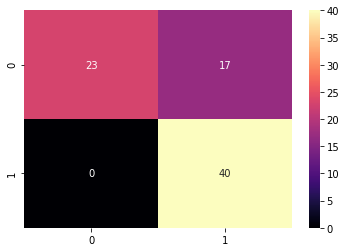

In [ ]:
sns.heatmap(cm, cmap="magma", annot= True)

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_actual, y_test)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

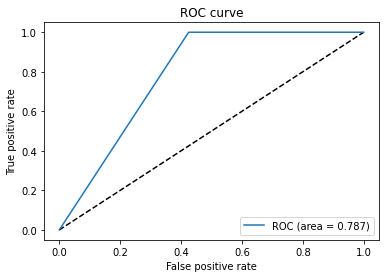

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

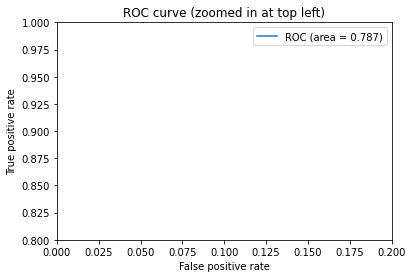

In [ ]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()